In [ ]:
#Question 1

In [2]:
import pandas as pd
data=pd.read_csv('JETAIRWAYS.csv')

In [3]:
returns=data['Close Price'].pct_change()

In [4]:
daily_returns=returns.mean()*100
daily_std_dev=returns.std()*100
print(daily_returns,daily_std_dev)

-0.19088047636779618 3.9362082158179414


In [5]:
import math 
annual_mean=daily_returns*252
annual_stddev=daily_std_dev*(math.sqrt(252))
print(annual_mean,annual_stddev)

-48.101880044684634 62.485368285741195


In [ ]:
#Question 2

In [6]:
data1=pd.read_csv('RAYMOND.csv')
data2=pd.read_csv('JETAIRWAYS.csv')
data3=pd.read_csv('APOLLOTYRE.csv')
data4=pd.read_csv('INFY.csv')
data5=pd.read_csv('ASIANPAINT.csv')
li=[data1,data2,data3,data4,data5]
data=pd.concat(li)

In [7]:
returns=data['Close Price'].pct_change()
daily_returns=returns.mean()*100
daily_std_dev=returns.std()*100
#print(daily_returns,daily_std_dev)
annual_mean=daily_returns*252
annual_stddev=daily_std_dev*(math.sqrt(252))
print(annual_mean,annual_stddev)

43.47999059265135 140.7695364104102


In [ ]:
#Question 3,4

In [53]:
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.90,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.50,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.50,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.00,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.00,723.10,740.30,561346,4.155619e+08,13328,137648,24.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,ASIANPAINT,EQ,07-May-2019,1412.80,1426.80,1426.80,1376.35,1391.00,1387.80,1396.83,2863939,4.000437e+09,78177,1822508,63.64
491,ASIANPAINT,EQ,08-May-2019,1387.80,1382.00,1395.00,1362.60,1395.00,1385.70,1379.52,1414591,1.951463e+09,40321,860170,60.81
492,ASIANPAINT,EQ,09-May-2019,1385.70,1384.95,1393.65,1346.55,1350.00,1354.20,1367.60,2628463,3.594676e+09,89032,998318,37.98
493,ASIANPAINT,EQ,10-May-2019,1354.20,1314.10,1350.00,1314.10,1345.00,1341.05,1335.23,3476379,4.641774e+09,143729,1638493,47.13


Black star indicates that the volatility is minimum at that point
Red star indicates that the sharpe ratio is maximum for that point


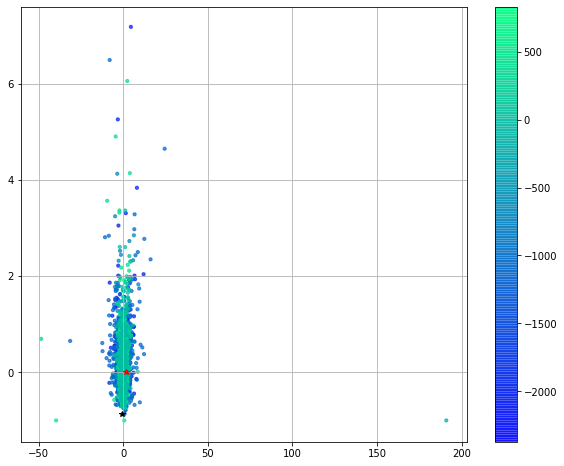

In [116]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
import numpy as np
r=-123243245
x=0
y=0
li_x=[]
li_y=[]
li_z=[]
li_c=[]
for ele in li:
    #weight=(ele['Turnover']/ele['No. of Trades'])*100
    ele['returns']=((ele['Close Price']-ele['Prev Close'])/ele['Prev Close'])*100
    returns=np.array(returns).reshape(-1,1)
    ele['vol']=(ele['High Price']-ele['Low Price'])/(ele['High Price']+ele['Low Price'])
    ele['vol']=ele['vol'].pct_change()
    ele['vol']=np.array(ele['vol']).reshape(-1,1)
    #print(returns.shape,vol.shape)
    #print(pd.DataFrame(returns/vol).dropna().max())
    x=(ele[ele['vol']==ele['vol'].min()].index[0])
    li_z.append(ele.iloc[x,-1])
    li_c.append(ele.iloc[x,-2])
    #y=ele[(ele['Returns']/eleele['returns']/ele['vol']).max()].index[0]
    ele['sharpe']=(ele['returns']/ele['vol'])
    y=(ele[ele['sharpe']==ele['sharpe'].max()].index[0])
    li_x.append(ele.iloc[y,-3])
    li_y.append(ele.iloc[y,-2])
    
   
    plt.scatter(ele['returns'],ele['vol'],c=(ele['returns']/ele['vol']),cmap='winter',s=10,alpha=0.7)
    
plt.grid()
plt.colorbar()
#plt.legend(['1','2','3','4','5'])
plt.plot(li_x[0],li_y[0],marker="*",color='red')
plt.plot(li_z[0],li_c[0],marker="*",color='black')
print('Black star indicates that the volatility is minimum at that point')
print('Red star indicates that the sharpe ratio is maximum for that point')
plt.plot()
plt.show()